# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I Team-GM4, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [70]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.correlation import plot_corr

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import math
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###
import warnings
warnings.filterwarnings("ignore")

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [71]:
df_train=pd.read_csv('df_train.csv')
df_test=pd.read_csv('df_test.csv')

# Introduction 

- The use of purely non-renewable resources is not sustainable. 
- There is a need to keep the lights on in order to maintain and improve the standard of living by investing in electricity infrastructure. 
- The government of Spain is contemplating the expansion of its renewable resource infrastructure investments.
- In this project we have been tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources for the country of Spain.

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


- Exploratory Data Analysis (EDA) helps us to understand our data without making any assumptions. EDA is a vital component as it provides context and guidance on the course of action to take when developing the appropriate model. 
- It will also assist in interpreting the results correctly. In this section we will be using graphical and non- graphical data to analyse the data provided by the government of Spain. 

EDA on both Test and Train data 

In [72]:
# observing our data statistics
df_train.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [73]:
# here we are checking our train dataset and we can see that we are having an unnamed column and two categorical columns
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [77]:
#visual representation of our test data 
df_test.head(3)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.0,71.333333,20.0,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.15,283.150000,279.866667,279.15
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.0,78.000000,0.0,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.15,281.150000,279.193333,278.15
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.0,89.666667,0.0,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.15,280.483333,276.340000,276.15


In [78]:
# on our train correlation we can see that we are having some strong correlation which we need to drop
df_train.corr()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,...,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,-0.068123,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.049197,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,-0.140583,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,-0.155738,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800


<AxesSubplot:>

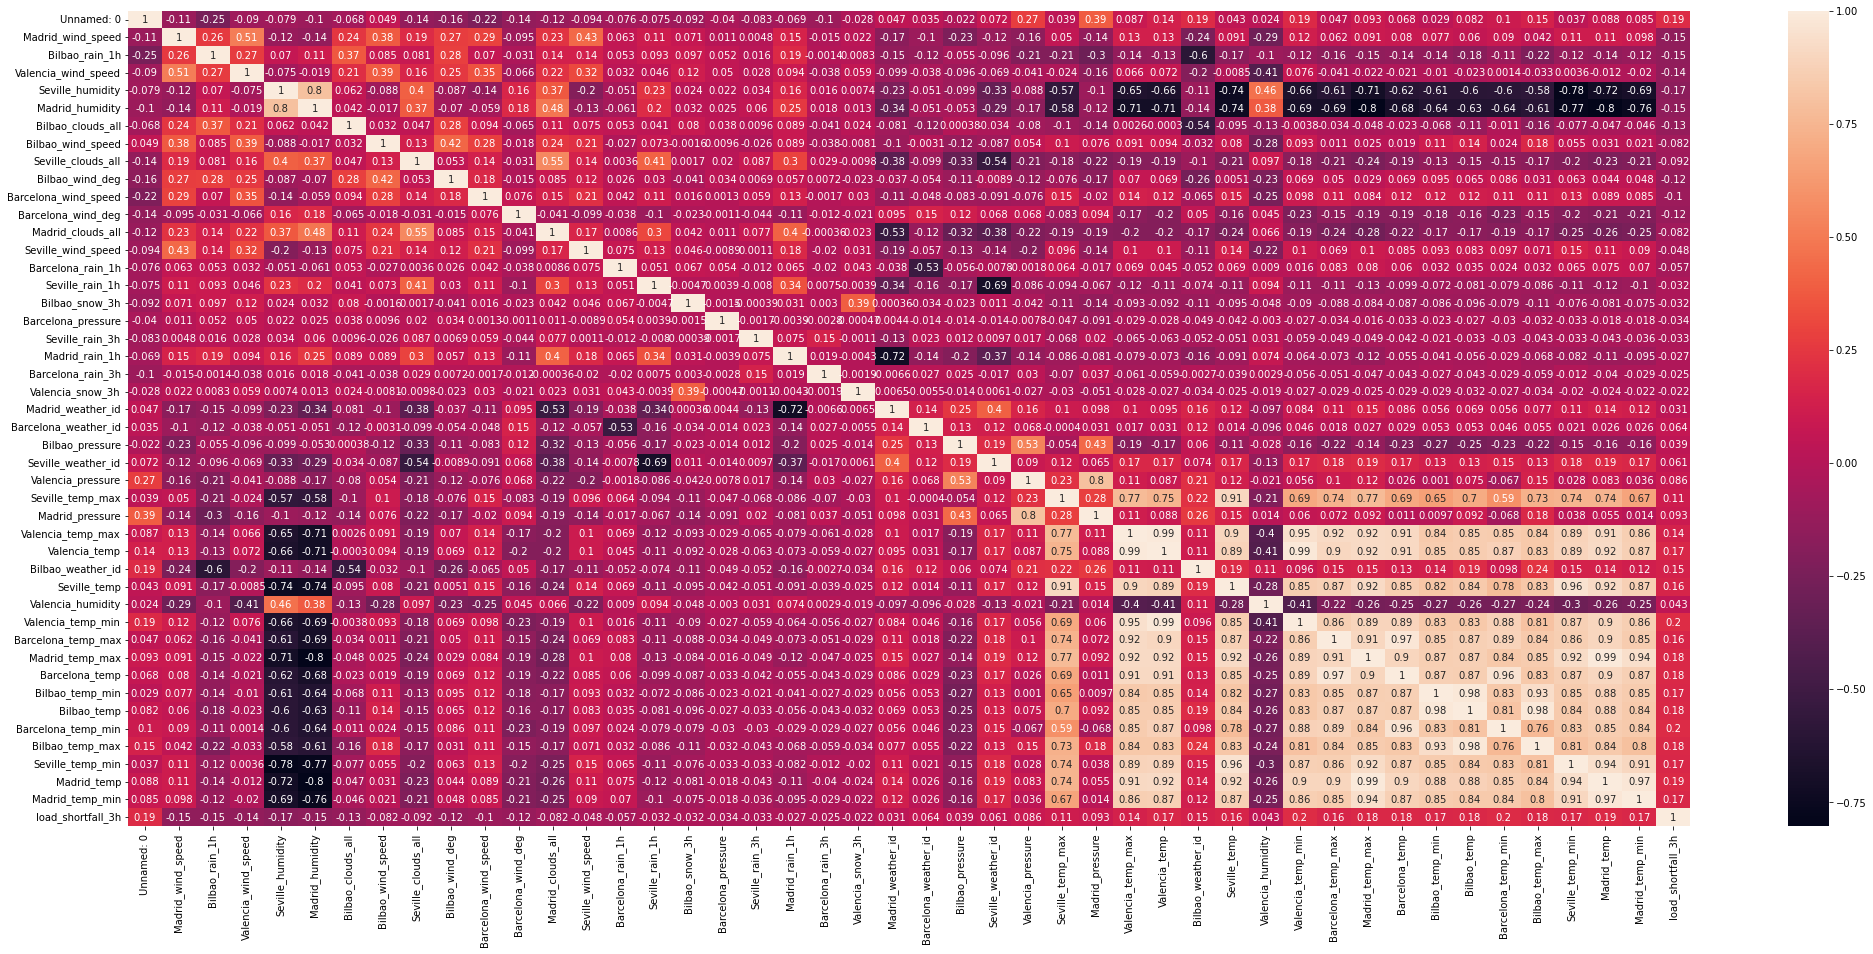

In [79]:
# viewing our data on a heatmap
plt.figure(figsize=[35,15])
sns.heatmap(df_train.corr(),annot=True )

-	A correlation heatmap is a graphical representation of a correlation matrix representing the correlation between different variables. The value of correlation can take any value from -1 to 1. 
- We plotted the correlation of the train data before we processed the data to determine which data points are highly correlated and which are not correlated, this helped us determine which features to keep and which to exclude in the model selection. 
-	We looked at our target variable  which is our Load Shortfall and its distribution with an outline of what a normal distribution would look like and where the target variable is distributed. 


### Analyzing the characteristics of the data.

In [80]:
#viewing our train information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [81]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2920 non-null   int64  
 1   time                  2920 non-null   object 
 2   Madrid_wind_speed     2920 non-null   float64
 3   Valencia_wind_deg     2920 non-null   object 
 4   Bilbao_rain_1h        2920 non-null   float64
 5   Valencia_wind_speed   2920 non-null   float64
 6   Seville_humidity      2920 non-null   float64
 7   Madrid_humidity       2920 non-null   float64
 8   Bilbao_clouds_all     2920 non-null   float64
 9   Bilbao_wind_speed     2920 non-null   float64
 10  Seville_clouds_all    2920 non-null   float64
 11  Bilbao_wind_deg       2920 non-null   float64
 12  Barcelona_wind_speed  2920 non-null   float64
 13  Barcelona_wind_deg    2920 non-null   float64
 14  Madrid_clouds_all     2920 non-null   float64
 15  Seville_wind_speed   

### Reviewing the null values. 

In [82]:
df_train.isna().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [83]:
df_test.isna().sum()

Unnamed: 0                0
time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp        

<AxesSubplot:>

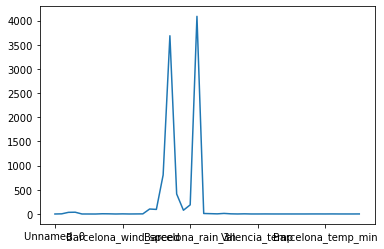

In [84]:
# now we observing our data distribution
df_train.kurtosis().plot()

In [85]:
# searching for outliers from our data
df_train.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

Both kurtosis and skew are important statistical terms to be familiar with in data science. Kurtosis is the measure of outliers present in the data. **High kurtosis (>3)** indicates a large number of outliers and **low kurtosis (<3)** a lack of outliers.


We can see from our data above from there are a few significant outliers namely: 
- Barcelona_rain_1h        101.578
- Seville_rain_1h           93.840
- Bilbao_snow_3h           806.128
- Barcelona_pressure      3687.564
- Seville_rain_3h          413.136
- Madrid_rain_1h            76.584
- Barcelona_rain_3h        187.800
- Valencia_snow_3h        4089.323 

<AxesSubplot:xlabel='Barcelona_pressure'>

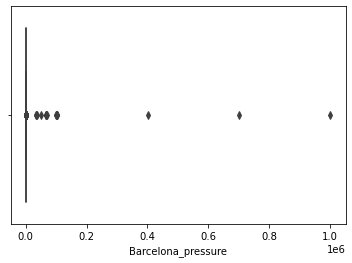

In [86]:
# observing our outliers on a box plot
sns.boxplot(df_train['Barcelona_pressure'])

- We further analyzed the Barcelona Pressure which is one of our skewed data noted above. This is a visual that highlights the outliers and what the data looks like. 
- This is one of the variables we will have to close watch and it can distort our model predictions due to the data anomaly.


<AxesSubplot:>

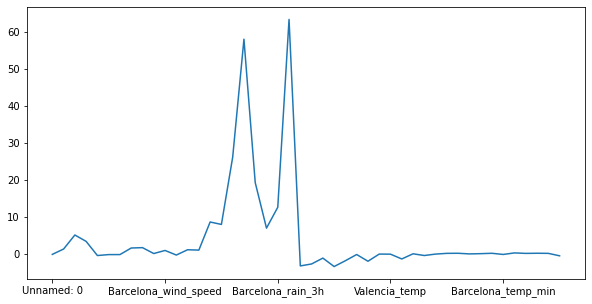

In [87]:
plt.figure(figsize = [10,5])
df_train.skew(axis=0, skipna=True).plot()

In [88]:
#looking at the skewness of our dataset
df_train.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

- Skew will indicate how symmetrical your data is. From the data above we can see that most of our data falls between the ranges of -1 and 0. We do have a few outliers, like the ones identified in the kurtosis analysis above. 

- This would incident that most of our data is slightly symmetrical which a skew more to the left side. However, this is balanced out by data sets above 1 which reflects a positive skew.  

In [89]:
# looking at the relationship between load_shortfall_3h and time in years
px.line(df_train.groupby([df_train['time'].astype('datetime64').dt.year])['load_shortfall_3h'].mean(),
        title = 'Load_shortfall_3h grouped by Year',
        y='load_shortfall_3h',width =800, height=400 )


<AxesSubplot:xlabel='time'>

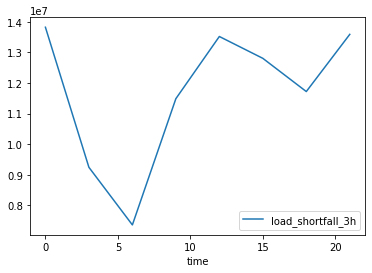

In [90]:
df_train.groupby([df_train['time'].astype('datetime64').dt.hour])['load_shortfall_3h'].sum().plot(legend = True)

- We decided to visualize the load_shortfall as well so we can understand the trajectory of the data. 
- There was an downward trend between 2015 and mid of 2015, however the load_shortfall took a sharp upward trend since 2016 and would be increasing further on 
- We will need to predict the future trends of the load_shortfall using the data provided by the government of Spain.
- The second graph shows us the time of the day and what the shortfall looks like during the day. It starts out on a declining trajectory and starts to pick up sharply as the day progresses.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

- Below we will be working on the data mining, this is the process of rigorously cleaning our data and ensuring our data is usable and can be inputted into a model that will be able to interpret the data. 
- Cleaning the data is also important because it improves the data quality With cleaning data all the outdated or irrelevent information is gone – leaving us with the highest quality information.

**Removing missing values/ features**

In [91]:
#imputing the null values with the mean
df_train['Valencia_pressure'].fillna(df_train['Valencia_pressure'].mean(), inplace = True)
df_test['Valencia_pressure'].fillna(df_test['Valencia_pressure'].mean(), inplace = True)

In [92]:
# as we have seen previously that our data has some columns which we need to convert their data types
# we also have some outliers which need to be taken care of
df_train.Valencia_snow_3h = df_train.Valencia_snow_3h.astype(np.int64)
df_train.Bilbao_snow_3h = df_train.Bilbao_snow_3h.astype(np.int64)
df_train['Valencia_wind_deg'] = df_train['Valencia_wind_deg'].str.extract('(\d+)').astype('int64')
df_train['Seville_pressure'] = df_train['Seville_pressure'].str.extract('(\d+)').astype('int64')

In [93]:
#coverting the data type in the test data
df_test.Valencia_snow_3h = df_test.Valencia_snow_3h.astype(np.int64)
df_test.Bilbao_snow_3h = df_test.Bilbao_snow_3h.astype(np.int64)
df_test['Valencia_wind_deg'] = df_test['Valencia_wind_deg'].str.extract('(\d+)').astype('int64')
df_test['Seville_pressure'] = df_test['Seville_pressure'].str.extract('(\d+)').astype('int64')

In [94]:
#target= train0['load_shortfall_3h']
#test_time= test0['time']

df_train1= df_train.drop(['Unnamed: 0'], axis=1)
df_test1= df_test.drop(['Unnamed: 0'], axis=1)

In [95]:
df_train1.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [96]:
#showing what are test data looks like 
df_test1.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,2018-01-01 00:00:00,5.000000,8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,2018-01-01 03:00:00,4.666667,8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,2018-01-01 06:00:00,2.333333,7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,2018-01-01 09:00:00,2.666667,7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,2018-01-01 12:00:00,4.000000,7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


**Engineer existing features**

In [97]:
#checking for null values 
df_train1.isna().sum()

time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_

<AxesSubplot:>

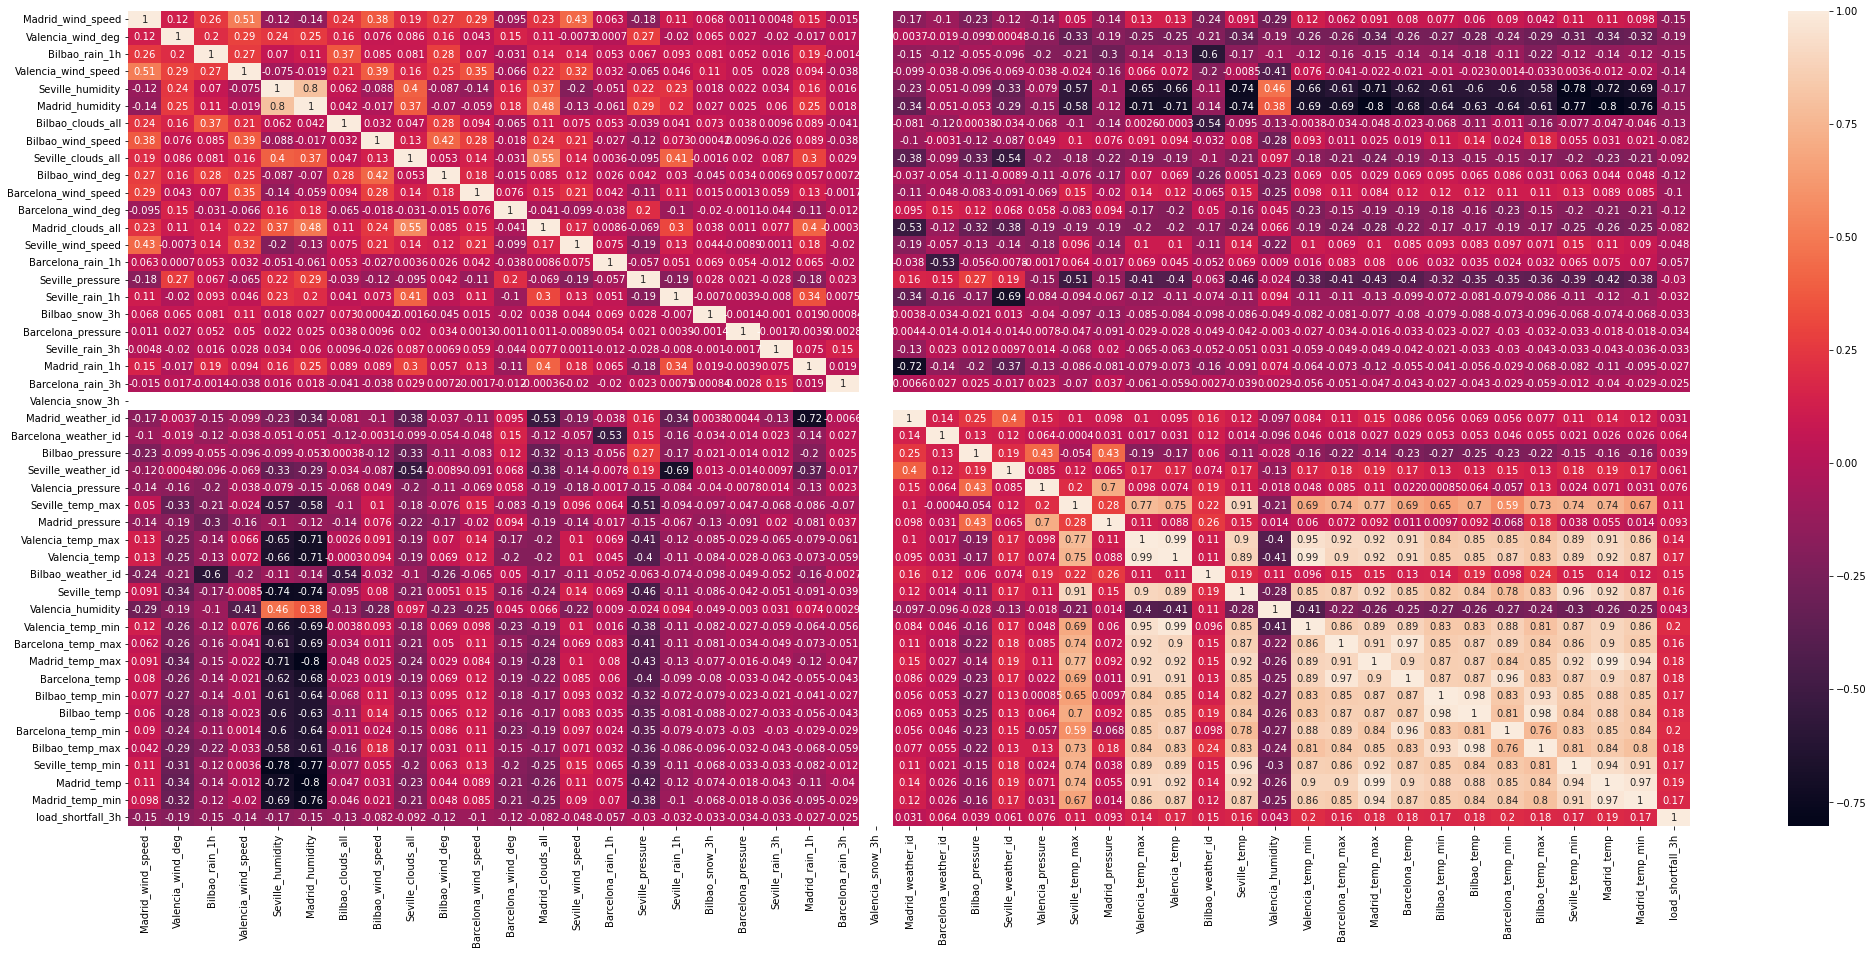

In [98]:
#showcasing the correlation between our data variables 
plt.figure(figsize=[35,15])
sns.heatmap(df_train1.corr(),annot=True )

In [99]:
## in this section we decided to use the data with no strong correlation 
df_train2=df_train1[['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Bilbao_weather_id', 
        'Valencia_humidity', 'time', 'load_shortfall_3h']]

In [100]:
## in this section we decided to use the data with no strong correlation
df_test2=df_test1[['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Bilbao_weather_id', 
        'Valencia_humidity', 'time']]

<AxesSubplot:>

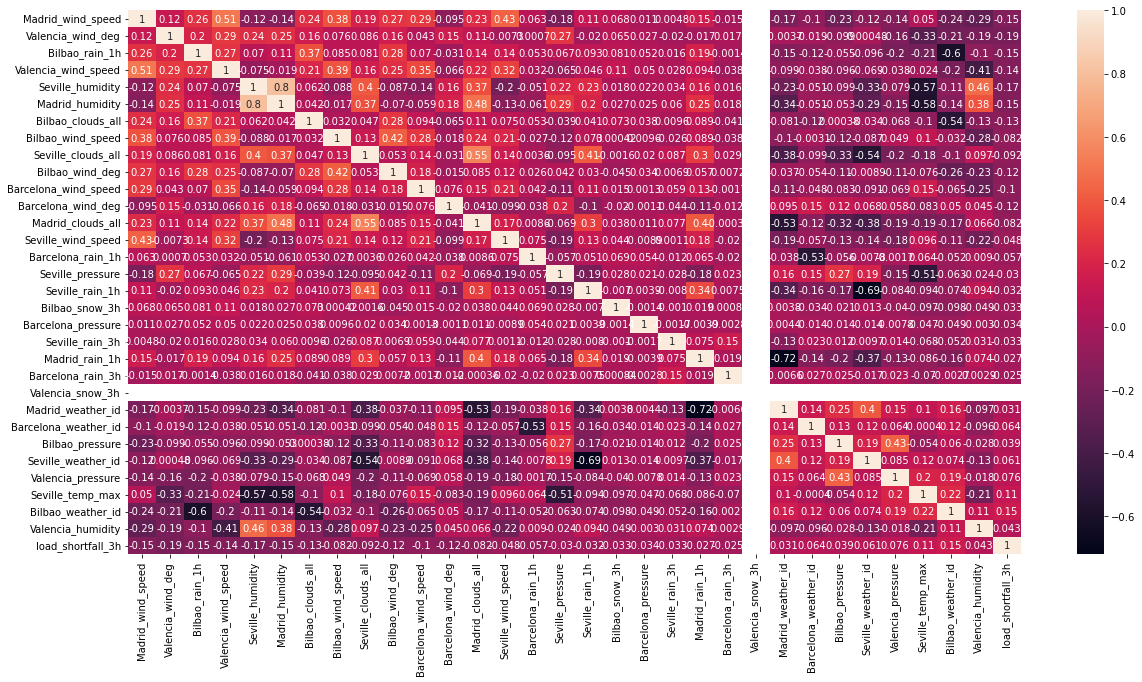

In [101]:
#our heapmap with the refined processed data 
plt.figure(figsize=[20,10])
sns.heatmap(df_train2.corr(),annot=True )

-	Above is a refined heatmap, we have removed certain highly correlated data points for the feature engineering. 
- When you have two independent variables that are very highly correlated, you should remove one of them because you run into the multicollinearity conundrum and your regression model's regression coefficients related to the two highly correlated variables will be unreliable. 
- Removing correlated features helps to infer meaning about the features.

In [102]:
df_train2['time'] = df_train2['time'].str.extract('(\d+)').astype('int64')

- Below we will be processing our data further to ensure it will be fit for the modelling part. It is important to scale the features so that the predictors have a mean of 0. 
- This makes it easier to interpret the intercept term as the expected value of Y when the predictor values are set to their means.
- As you can see below we have scaled the data and the ranges is now between  -0 and 1. 

In [103]:
#splitting our features and lables 
target= df_train2['load_shortfall_3h']
df_train3= df_train2.drop(['load_shortfall_3h', 'time'], axis=1)

In [104]:
scaler = StandardScaler()

In [105]:
#scaling our data 
X_scaled = scaler.fit_transform(df_train3)
df_train3 = pd.DataFrame(X_scaled,columns=df_train3.columns)
df_train3.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Bilbao_weather_id,Valencia_humidity
0,-0.950708,-0.096053,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,...,-0.110037,0.0,0.342424,0.385993,1.718219,0.352274,-1.129531e+00,-2.616796,0.649842,0.540928
1,-1.130863,1.641580,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,...,-0.110037,0.0,0.342424,0.385993,1.784583,0.352274,-9.289340e-01,-2.539014,0.649842,0.298645
2,-0.770554,1.294054,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,...,-0.110037,0.0,0.342424,0.385993,1.817765,0.352274,-8.085757e-01,-2.105564,0.649842,0.021750
3,-0.770554,0.946527,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,...,-0.110037,0.0,0.342424,0.385993,1.817765,0.352274,-3.672620e-01,-1.361703,0.649842,-0.583957
4,-0.770554,0.599000,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,...,-0.110037,0.0,0.342424,0.385993,1.751401,0.352274,2.736630e-13,-1.348214,0.649842,-0.358980


In [106]:
import scipy.stats

- Below we wanted to further analyse the skewsness of our data to see if our refined data is symmetrical and ready to use for our model building. 
- As compared to the skew analysis earlier we can see our outliers that was significant have narrowed to be in sync with the rest of the data points. 

In [107]:
scipy.stats.skew(df_train3.select_dtypes(np.number))

array([ 1.44089753e+00,  8.83388145e-02,  5.22190794e+00,  3.49903744e+00,
       -3.10121902e-01, -5.73679475e-02, -5.30763081e-02,  1.71662021e+00,
        1.81414119e+00,  2.26887668e-01,  1.05714961e+00, -1.79970508e-01,
        1.24653120e+00,  1.15080881e+00,  8.72549369e+00, -8.60072538e-02,
        8.06596036e+00,  2.76527987e+01,  5.79697388e+01,  1.93392628e+01,
        7.07309667e+00,  1.26944320e+01,  0.00000000e+00, -3.10719048e+00,
       -2.58356829e+00, -9.99470839e-01, -3.27501362e+00, -1.95038081e+00,
       -3.39250180e-02, -1.23463260e+00, -3.05704989e-01])

In [108]:
skew_df =pd.DataFrame(df_train3.select_dtypes(np.number).columns, columns=['feature'])
skew_df['skew']=skew_df['feature'].apply(lambda feature: scipy.stats.skew(df_train3[feature]))
skew_df['Absolute_skew']= skew_df['skew'].apply(abs)
skew_df['skewed']=skew_df['Absolute_skew'].apply(lambda x: True if x >= 0.5 else False)

skew_df.head()

,feature,skew,Absolute_skew,skewed
0,Madrid_wind_speed,1.440898,1.440898,True
1,Valencia_wind_deg,0.088339,0.088339,False
2,Bilbao_rain_1h,5.221908,5.221908,True
3,Valencia_wind_speed,3.499037,3.499037,True
4,Seville_humidity,-0.310122,0.310122,False


In [109]:
skew_df.query("skewed == True")['feature']

0        Madrid_wind_speed
2           Bilbao_rain_1h
3      Valencia_wind_speed
7        Bilbao_wind_speed
8       Seville_clouds_all
10    Barcelona_wind_speed
12       Madrid_clouds_all
13      Seville_wind_speed
14       Barcelona_rain_1h
16         Seville_rain_1h
17          Bilbao_snow_3h
18      Barcelona_pressure
19         Seville_rain_3h
20          Madrid_rain_1h
21       Barcelona_rain_3h
23       Madrid_weather_id
24    Barcelona_weather_id
25         Bilbao_pressure
26      Seville_weather_id
27       Valencia_pressure
29       Bilbao_weather_id
Name: feature, dtype: object

In [110]:
df_train3[skew_df.query("skewed == True")['feature'].values].describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Bilbao_wind_speed,Seville_clouds_all,Barcelona_wind_speed,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,...,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Bilbao_weather_id
count,8.763000e+03,8.763000e+03,8.763000e+03,8.763000e+03,8.763000e+03,8.763000e+03,8.763000e+03,8.763000e+03,8.763000e+03,8.763000e+03,...,8.763000e+03,8.763000e+03,8.763000e+03,8.763000e+03,8.763000e+03,8.763000e+03,8.763000e+03,8.763000e+03,8.763000e+03,8.763000e+03
mean,-6.354738e-16,1.098142e-14,3.724309e-16,-7.394598e-16,-6.872006e-15,-9.867467e-16,3.498742e-15,-1.887525e-15,4.241709e-15,5.778601e-15,...,-3.621682e-16,-9.447589e-15,-1.704372e-15,1.556897e-15,1.343657e-16,-1.913199e-15,-5.290631e-15,5.491493e-15,-1.838794e-14,3.431036e-15
std,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,...,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00
min,-1.311017e+00,-3.621235e-01,-1.072673e+00,-1.091146e+00,-5.650650e-01,-1.601755e+00,-6.941876e-01,-1.449693e+00,-2.030991e-01,-2.242780e-01,...,-5.026158e-02,-6.627791e-02,-2.477763e-01,-1.100372e-01,-7.276362e+00,-6.414011e+00,-4.619579e+00,-7.988484e+00,-4.740279e+00,-4.466414e+00
25%,-7.705541e-01,-3.621235e-01,-6.579168e-01,-6.980158e-01,-5.650650e-01,-6.717449e-01,-6.941876e-01,-8.518923e-01,-2.030991e-01,-2.242780e-01,...,-2.586383e-02,-6.627791e-02,-2.477763e-01,-1.100372e-01,3.424238e-01,3.859926e-01,-4.718058e-01,3.522745e-01,2.736630e-13,-2.105408e-01
50%,-2.300910e-01,-3.621235e-01,-3.814124e-01,-5.014507e-01,-5.650650e-01,-1.137387e-01,-6.941876e-01,-2.540919e-01,-2.030991e-01,-2.242780e-01,...,-2.557959e-02,-6.627791e-02,-2.477763e-01,-1.100372e-01,3.424238e-01,3.897746e-01,1.254736e-01,3.522745e-01,1.141711e-01,6.498419e-01
75%,4.905264e-01,-9.537095e-02,4.481010e-01,4.813748e-01,2.589604e-01,6.302696e-01,4.940793e-01,5.429753e-01,-2.030991e-01,-2.242780e-01,...,-2.529534e-02,-6.627791e-02,-2.477763e-01,-1.100372e-01,3.510472e-01,3.973386e-01,6.232064e-01,3.522745e-01,6.357236e-01,6.642296e-01
max,5.715003e+00,7.640452e+00,2.049467e+01,6.378328e+00,3.445192e+00,5.466323e+00,2.870613e+00,5.524645e+00,1.870367e+01,1.683604e+01,...,7.106374e+01,2.543908e+01,1.940760e+01,2.317431e+01,3.941643e-01,4.313764e-01,2.415044e+00,4.078795e-01,1.157276e+00,6.843723e-01


In [111]:
for column in skew_df.query("skewed == True")['feature'].values:
    df_train3[column] = np.log1p(df_train2[column])

In [112]:
df_train3=pd.get_dummies(df_train3)
df_train3.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Bilbao_weather_id,Valencia_humidity
0,0.510826,-0.096053,0.0,0.510826,0.516117,0.270621,-1.335491,0.693147,0.0,0.630823,...,0.0,0.0,6.685861,6.685861,6.943122,6.685861,6.911415,-2.616796,6.685861,0.540928
1,0.287682,1.641580,0.0,0.980829,0.692953,0.298017,-1.335491,0.693147,0.0,0.607959,...,0.0,0.0,6.685861,6.685861,6.943766,6.685861,6.913074,-2.539014,6.685861,0.298645
2,0.693147,1.294054,0.0,0.693147,0.383491,0.284319,-1.335491,0.693147,0.0,0.542632,...,0.0,0.0,6.685861,6.685861,6.944087,6.685861,6.914069,-2.105564,6.685861,0.021750
3,0.693147,0.946527,0.0,0.693147,0.118238,-0.044439,-1.335491,0.693147,0.0,0.398912,...,0.0,0.0,6.685861,6.685861,6.944087,6.685861,6.917706,-1.361703,6.685861,-0.583957
4,0.693147,0.599000,0.0,0.693147,-0.161751,-0.017043,-1.274045,0.287682,0.0,0.255192,...,0.0,0.0,6.685861,6.685861,6.943444,6.685861,6.920722,-1.348214,6.685861,-0.358980


In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
# scalling
scaler=StandardScaler()
scaler.fit(df_train3)

df_train3=pd.DataFrame(scaler.transform(df_train3), index=df_train3.index, columns=df_train3.columns)

<AxesSubplot:>

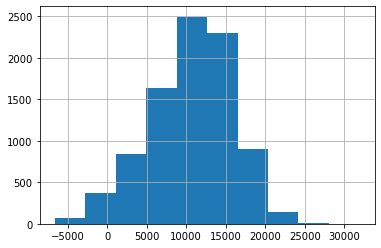

In [115]:
target.hist()

In [116]:
np.min(target)

-6618.0

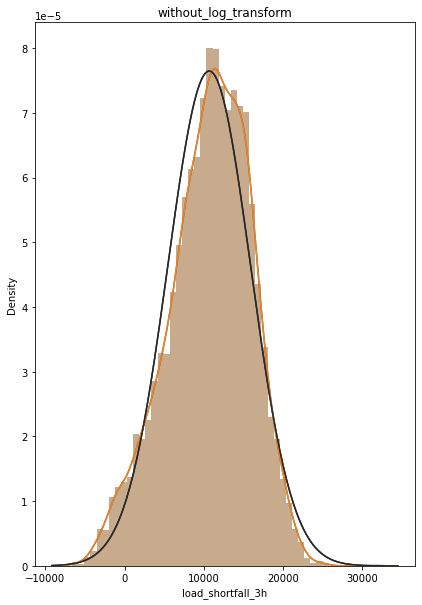

In [117]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
sns.distplot(target, kde=True, fit=scipy.stats.norm)
plt.title('with_log_transform')
plt.subplot(1, 2, 1)
sns.distplot(target, kde=True, fit=scipy.stats.norm)
plt.title('without_log_transform')
plt.show()

- Above is a depiction of our data in the form of a bell curve. We can see that even though it is not at the centre the data is faily symmertical and ready to be inputed into our model for further analysis.
- We did attempt to use log function to aid in making the data even more symeetical but we found that it was better off without the log function. 

In [118]:
#assigning the value if X
X = df_train3.copy()

In [119]:
#printing the values of X 
X

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Bilbao_weather_id,Valencia_humidity
0,-1.229809,-0.096053,-0.454856,-1.098916,0.516117,0.270621,-1.335491,-0.403293,-0.724368,0.630823,...,-0.110825,0.0,0.328322,0.373138,1.700081,0.333970,-1.121486,-2.616796,0.625933,0.540928
1,-1.689702,1.641580,-0.454856,-0.242518,0.692953,0.298017,-1.335491,-0.403293,-0.724368,0.607959,...,-0.110825,0.0,0.328322,0.373138,1.764986,0.333970,-0.920821,-2.539014,0.625933,0.298645
2,-0.854050,1.294054,-0.454856,-0.766706,0.383491,0.284319,-1.335491,-0.403293,-0.724368,0.542632,...,-0.110825,0.0,0.328322,0.373138,1.797423,0.333970,-0.800581,-2.105564,0.625933,0.021750
3,-0.854050,0.946527,-0.454856,-0.766706,0.118238,-0.044439,-1.335491,-0.403293,-0.724368,0.398912,...,-0.110825,0.0,0.328322,0.373138,1.797423,0.333970,-0.360723,-1.361703,0.625933,-0.583957
4,-0.854050,0.599000,-0.454856,-0.766706,-0.161751,-0.017043,-1.274045,-1.181366,-0.724368,0.255192,...,-0.110825,0.0,0.328322,0.373138,1.732539,0.333970,0.004112,-1.348214,0.625933,-0.358980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,-0.854050,0.251474,-0.454856,0.337740,1.164513,1.571954,0.405464,1.478883,1.876338,0.663487,...,-0.110825,0.0,-0.446573,0.382109,-0.002280,-0.011690,0.004112,-1.351637,0.641929,0.315951
8759,1.410161,0.251474,-0.454856,-0.027904,0.855051,1.133610,-0.516218,2.482978,1.838630,0.598160,...,-0.110825,0.0,-0.069611,0.382109,-0.233653,0.367072,1.067729,-1.013621,0.635079,-1.293500
8760,1.823738,1.294054,1.116697,1.833656,0.221392,0.558284,0.610283,2.552766,1.368363,1.218768,...,-0.110825,0.0,-0.736288,0.382109,-0.035301,0.352375,-0.280921,-0.675604,-0.944632,-1.068523
8761,2.087199,0.946527,0.396709,1.833656,0.221392,0.887042,0.610283,0.759860,1.621581,0.598160,...,-0.110825,0.0,-3.513664,0.373138,0.261499,0.359726,0.949334,-0.675604,-0.649715,-1.051217


In [120]:
#allocating the value of y 
y = target

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

- In this section of our model building we will be training our models using Linear Regression and numerous other models. We will further test our models by generating predictions of our load_shortfall. 
- Thereafter we will assess which trained model produces the best results. 

In [121]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [122]:
# Compare model performance
from sklearn.metrics import mean_squared_error

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 42)

In [124]:
#we printing the shape of our data points 
print('Training predictor:', X_train.shape)
print('Training target:', y_train.shape)
print('Testing predictor:', X_test.shape)
print('Testing target:' , y_test.shape)

Training predictor: (7010, 31)
Training target: (7010,)
Testing predictor: (1753, 31)
Testing target: (1753,)


**Fitting Linear Regression model**

In [125]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lin_pred = lm.predict(X_test)
train_predict = lm.predict(X_test) 

**Fitting CatBoost model**

In [126]:
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold, cross_val_score

In [127]:
base_model= CatBoostRegressor(verbose=0)
kf= KFold(n_splits=10)
results = cross_val_score(base_model, target, scoring='neg_mean_squared_error', cv=kf)
base_model.fit(X_train,y_train)
cat_pred=base_model.predict(X_test)

**Fitting DecisionTree Regressor**

In [128]:
d_tree = DecisionTreeRegressor(max_depth=3)
bst_reg = AdaBoostRegressor(base_estimator = d_tree)
bst_reg.fit(X_train,y_train)
dec_pred = bst_reg.predict(X_test)

**Fitting Random Forest Model**

In [129]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=100, max_depth=5)
RF.fit(X_train,y_train)
rand_pred = RF.predict(X_test)

# 6.Model Perfomance

**Comparing Actual value and Predicted value**

In [130]:
Linear = pd.DataFrame({'Actual': y_test, 'Predicted': lin_pred})
catboost=pd.DataFrame({'Actual': y_test, 'Predicted': cat_pred})
Dec_t = pd.DataFrame({'Actual': y_test, 'Predicted': dec_pred})
Random = pd.DataFrame({'Actual': y_test, 'Predicted': rand_pred})

In [131]:
print(Linear.head())  
print('\n')
print(catboost.head())
print('\n')
print(Dec_t.head())
print('\n')
print(Random.head())
print('\n')

            Actual     Predicted
1226  11450.666667  12888.247485
7903  13693.333333  12076.430185
1559  18337.333333  12786.270909
3621  -1221.000000   8552.097673
7552   8515.000000  14190.629360


            Actual     Predicted
1226  11450.666667  10399.458194
7903  13693.333333  12224.043361
1559  18337.333333  15795.259394
3621  -1221.000000   4296.161120
7552   8515.000000  12929.717687


            Actual     Predicted
1226  11450.666667  10666.895697
7903  13693.333333  10349.205655
1559  18337.333333  11128.299190
3621  -1221.000000   8368.157080
7552   8515.000000  11536.494613


            Actual     Predicted
1226  11450.666667  11160.912154
7903  13693.333333  11811.899324
1559  18337.333333  12421.906805
3621  -1221.000000   7615.000712
7552   8515.000000  12871.986913




**Comparing root mean squared error** 

In [132]:
Model_Performance = { 
    
                      'Test RMSE':
                    
                        {"linear model": np.sqrt(metrics.mean_squared_error(y_test,lin_pred)),
                        "catboost": np.sqrt(metrics.mean_squared_error(y_test,cat_pred)),
                        "decision tree" : np.sqrt(metrics.mean_squared_error(y_test,dec_pred)),
                        "random forest" : np.sqrt(metrics.mean_squared_error(y_test,rand_pred))}
                        
                    }

# create dataframe from dictionary
Model_Performance = pd.DataFrame(data=Model_Performance)
Model_Performance

,Test RMSE
catboost,4390.639808
decision tree,5070.988322
linear model,5009.117805
random forest,4906.393901


**Comparing mean absolute error**

In [133]:
Model_Performance = { 
    
                      'Test MAE':
                    
                        {"linear model": np.sqrt(metrics.mean_squared_error(y_test,lin_pred)),
                        "catboost": np.sqrt(metrics.mean_squared_error(y_test,cat_pred)),
                        "decision tree" : np.sqrt(metrics.mean_squared_error(y_test,dec_pred)),
                        "random forest" : np.sqrt(metrics.mean_squared_error(y_test,rand_pred))}
                        
                    }

# create dataframe from dictionary
Model_Performance = pd.DataFrame(data=Model_Performance)
Model_Performance

,Test MAE
catboost,4390.639808
decision tree,5070.988322
linear model,5009.117805
random forest,4906.393901


- Root Mean Squared Error(RMSE)and Mean Absolute Error (MAE) are the metrics we used to evaluate the Regression Models we chose. They tell us how accurate our predictions are and the amount of deviation from the actual values. 
- Our RMSE score are quite high, our lowest score comes from the CatBoost Model which means it is a slightly better fit for our data set. 
- The MAE seems to follow suite with the RMSE score, the Catboost Model perfomed the best as well. 
- Comparing the actual values and the predicted values of the chosen model makes us realise that some of the 
 actual values were greater than the predicted values and some were less, the difference between the 
 actual and the predicted value is known as an error.

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

### Model Analysis

- At first we used the Linear Regression model to make our predictions however the performance was not that strong reason being that linear model is not good when dealing with data that is not linear.


- We then decide to use Catboost model to make our predictions it did not perform best reason being that Catboost was designed to deal with categorical data.


- DecisionTrees are not affected by multicollinearity, they support non-linearity and are resistant to outliers furthermore they require little data preprocessing. However, DecisionTrees are prone to overfitting and parameter tuning can led to biased learned trees if some classes dominate.


- Random Forests address the problem of overfitting. They use ensemble learning methods for regression by constructing 
several DecisionTrees during training and outputs the mean of the classes as the prediction of all the trees.


# Conclusion

- As data scientists we have created a model that will help predict load shortfall for 3 hours in Spain this will help the government of Spain in informing them of any trends and patterns of the country's renewable resources and fossil fuel energy generation.


- The best model that out perfomed all the above was the CatBoost and it is the model we have chosen to share with the government of Spain. 


- This was a four week analysis that comprised of significant research and development, our efforts have been fruitful and we can confidently vouche for our model as being the best in the market. 

# References

- Explore Data Science Advance Regression Sprint 
- https://canworksmart.com/using-mean-absolute-error-forecast-accuracy/
- https://www.statology.org/how-to-interpret-rmse/